---
# TP2 - Introduction au Data Mining - Suite
Ce TP va vous permettre d'approfondir vos connaissances de la librairies Pandas en réalisant des manipuations plus complexes.  

---


0. Téléchargez le dataset au lien suivant: https://www.kaggle.com/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows  
Charger l'archive dans vos Fichiers Colab puis dézippé la:

In [523]:
# Unzip file
# !unzip archive.zip

Importation des librairies nécessaires:

In [524]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder

1. Lire le fichier imdb_top_1000.csv (pd.read_csv) et print les 5 premières lignes. Prendre le temps de comprendre les données.

In [525]:
# Read Data
df = pd.read_csv('imdb_top_1000.csv')
df_complet =df = df[df['Released_Year'] != 'PG']

# Print head
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


2. Combien y'a t-il de lignes et de colonnes et print les noms de colonne

In [526]:
# Number of rows
print(len(df))

# Number of columns
print(len(df.columns))

# Column names
df.columns

999
16


Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

3. Sélectionner seulement les colonnes suivantes:  
Series_Title, Released_Year, Runtime, Genre, IMDB_Rating, Overview, Director

In [527]:
# Select columns
pd.set_option('display.max_columns', None)
df = df[['Series_Title', 'Released_Year', 'Runtime', 'Genre', 'IMDB_Rating',
         'Overview', 'Director']]
df

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Overview,Director
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet
...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,Blake Edwards
996,Giant,1956,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,George Stevens
997,From Here to Eternity,1953,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann
998,Lifeboat,1944,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock


4. Renommer la colonne Series_Title en Title et IMDB_Rating en Score:

In [528]:
# Rename columns
df = df.rename(columns={'Series_Title': 'Title', 'IMDB_Rating': 'Score'})

df

,Title,Released_Year,Runtime,Genre,Score,Overview,Director
0,The Shawshank Redemption,1994,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont
1,The Godfather,1972,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola
2,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan
3,The Godfather: Part II,1974,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola
4,12 Angry Men,1957,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet
...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,Blake Edwards
996,Giant,1956,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,George Stevens
997,From Here to Eternity,1953,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann
998,Lifeboat,1944,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock


5. Dans la colonne Runtime, supprimer les chaînes de caractères pour ne garder que le temps en minute. A la fin de la manipulation la colonne doit être de type integer. Exemple: 112 min -> 112.

In [529]:
# Delete str and convert to int
df['Runtime'] = (df['Runtime'].str.replace('min','')).astype(int)
df

,Title,Released_Year,Runtime,Genre,Score,Overview,Director
0,The Shawshank Redemption,1994,142,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont
1,The Godfather,1972,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola
2,The Dark Knight,2008,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,Christopher Nolan
3,The Godfather: Part II,1974,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,Francis Ford Coppola
4,12 Angry Men,1957,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,Sidney Lumet
...,...,...,...,...,...,...,...
995,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,Blake Edwards
996,Giant,1956,201,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,George Stevens
997,From Here to Eternity,1953,118,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann
998,Lifeboat,1944,97,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock


6. On observe une anomalie pour la colonne *Released_Year*. Cette colonne devrait être composé que de int. Affichez toutes les préséentes dans la colonne.

In [530]:
# All unique values
df['Released_Year'].unique()

array(['1994', '1972', '2008', '1974', '1957', '2003', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943'], dtype=object)

7. On observe une valeur étrange, supprimez la ligne correspondante puis transformez le type de colonne en int. Faites aussi un reset des index. **Tips:** drop=True

In [531]:
# Select only non 'PG' rows
df = df[df['Released_Year'] != 'PG']

# Change column type
df['Released_Year'] = df['Released_Year'].astype(int)
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Title          999 non-null    object 
 1   Released_Year  999 non-null    int64  
 2   Runtime        999 non-null    int64  
 3   Genre          999 non-null    object 
 4   Score          999 non-null    float64
 5   Overview       999 non-null    object 
 6   Director       999 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


8. Combien de réalisateurs sont listés dans le dataframe?

In [532]:
# Number of directors
len(df['Director'].unique())

548

9. Quel est le réalisateur le plus prolifique de ce dataset?

In [533]:
# Count director occurence
df['Director'].value_counts().idxmax()

'Alfred Hitchcock'

10. Quelles sont les films réalisés par Christopher Nolan?

In [534]:
filmes_Christopher_Nolan = df[df['Director'] == 'Christopher Nolan']
filmes_Christopher_Nolan['Title']

2            The Dark Knight
8                  Inception
21              Interstellar
36              The Prestige
63     The Dark Knight Rises
69                   Memento
155            Batman Begins
573                  Dunkirk
Name: Title, dtype: object

11. Quelle est la durée moyenne de ces films? Et le score médian?

In [535]:
# Mean Runtime
print(filmes_Christopher_Nolan['Runtime'].mean())

# MaxTemp median

# Median Score
print(filmes_Christopher_Nolan['Score'].median())

140.25
8.45


12. Retour au dataframe complet, combien de genre distinct existe-t-il ? Nommez les.

In [536]:
# Split all Genre seperated by a comma

# df_complet['Genre'] = df_complet['Genre'].str.split(', ')
# df_complet['Genre']

g = (df["Genre"].str.split(", ", expand=True).stack()).unique()

# Flatten the list (1D)
genres = []
for genre in g:
  genres.append(genre)
print(genres)

# Suppress whitespaces (because ' Drama' is not the same as 'Drama')
# already done

# Select each Genre only 1 time
# already done

# Get the number of unique Genre
len(genres)

['Drama', 'Crime', 'Action', 'Adventure', 'Biography', 'History', 'Sci-Fi', 'Romance', 'Western', 'Fantasy', 'Comedy', 'Thriller', 'Animation', 'Family', 'War', 'Mystery', 'Music', 'Horror', 'Musical', 'Film-Noir', 'Sport']


21

13. En utilisant la fonction *groupby()*, compté le nombre de film sortie pour chaque date de la colonne Released_Year.

In [537]:
# Groupby Year
groupby = df_complet.groupby('Released_Year').size()
groupby

Released_Year
1920     1
1921     1
1922     1
1924     1
1925     2
        ..
2016    28
2017    22
2018    19
2019    23
2020     6
Length: 99, dtype: int64

14. Quelle année compte le plus grand nombre de sorties de films?

In [538]:
# Sort result
groupby.idxmax()

'2014'

15. En utilisant la libraire seaborn. Tracez un graphique montrant l'évolution du nombre de film par an. **Tips:** vous pouvez utilisez le résultat précédent et la fonction lineplot()

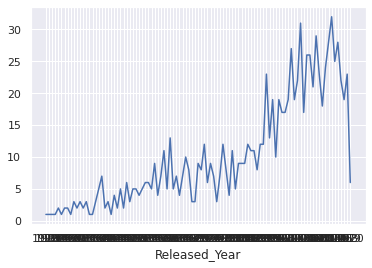

In [539]:
# Lineplot
sns.set()
# plt.plot(groupby.index, groupby)
sns.lineplot(x=groupby.index, y=groupby)

16. Combien de films chaque réalisateur a-t-il sortie par an ? **Tips:** regroupez les réalisateurs et les années de sorties puis comptez le nombre de titres.

In [540]:
# Film per year per director
# test = pd.DataFrame(df_complet.groupby(['Released_Year','Director'])['Series_Title'].count())
yd = df_complet.groupby(['Released_Year', 'Director']).size().sort_values()
yd

Released_Year  Director            
1920           Robert Wiene            1
2006           Martin Scorsese         1
               Mel Gibson              1
               Neil Burger             1
               Paul McGuigan           1
                                      ..
2008           Clint Eastwood          2
1994           Krzysztof Kieslowski    2
1974           Francis Ford Coppola    2
1957           Ingmar Bergman          2
1939           Victor Fleming          2
Length: 989, dtype: int64

17. Reprenez votre code précédent et ajoutez y le score moyen des films sorties la même année. **Tips:** utilisez *.agg()*

In [541]:
# Mean score per year
df
df.groupby(['Director','Released_Year']).aggregate({'Score':'mean', 'Title':'count'}).sort_values('Title')

Score  Title
Director             Released_Year              
Aamir Khan           2007            8.40      1
Norman Jewison       1967            7.90      1
                     1971            8.00      1
                     1999            7.60      1
Nuri Bilge Ceylan    2011            7.90      1
...                                   ...    ...
Francis Ford Coppola 1974            8.40      2
Clint Eastwood       2008            7.90      2
Mel Brooks           1974            7.85      2
Ingmar Bergman       1957            8.20      2
John Huston          1948            8.00      2

[989 rows x 2 columns]

18. Créez un dataframe (*df2*) qui ne regroupe que les films des genres: Western et Comedy

In [542]:
# Select Western et Comedy
df2 = df.loc[(df['Genre'] == 'Western') | (df['Genre'] == 'Comedy')]
df2.head()

,Title,Released_Year,Runtime,Genre,Score,Overview,Director
12,"Il buono, il brutto, il cattivo",1966,161,Western,8.8,A bounty hunting scam joins two men in an unea...,Sergio Leone
48,Once Upon a Time in the West,1968,165,Western,8.5,A mysterious stranger with a harmonica joins f...,Sergio Leone
78,Dr. Strangelove or: How I Learned to Stop Worr...,1964,95,Comedy,8.4,An insane general triggers a path to nuclear h...,Stanley Kubrick
115,Per qualche dollaro in più,1965,132,Western,8.3,Two bounty hunters with the same intentions te...,Sergio Leone
277,Life of Brian,1979,94,Comedy,8.1,Born on the original Christmas in the stable n...,Terry Jones


19. One-hot encodé la variable *Genre* de ce nouveau dataframe. **Tips:** jetez un oeil à la documentation pandas de [get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)  
Ensuite supprimez la colonne Genre. Vous devez obtenir un nouveau dataframe (*df3*) ayant comme forme (17,8).

In [543]:
# One-hot encoding
df3 = df2
new_genre = pd.get_dummies(df2['Genre'])
df3 = df3.drop(columns=['Genre'])
df3['Comedy'] = new_genre.Comedy
df3['Western'] = new_genre.Western
print(df3.shape)
df3


(17, 8)


,Title,Released_Year,Runtime,Score,Overview,Director,Comedy,Western
12,"Il buono, il brutto, il cattivo",1966,161,8.8,A bounty hunting scam joins two men in an unea...,Sergio Leone,0,1
48,Once Upon a Time in the West,1968,165,8.5,A mysterious stranger with a harmonica joins f...,Sergio Leone,0,1
78,Dr. Strangelove or: How I Learned to Stop Worr...,1964,95,8.4,An insane general triggers a path to nuclear h...,Stanley Kubrick,1,0
115,Per qualche dollaro in più,1965,132,8.3,Two bounty hunters with the same intentions te...,Sergio Leone,0,1
277,Life of Brian,1979,94,8.1,Born on the original Christmas in the stable n...,Terry Jones,1,0
417,Young Frankenstein,1974,106,8.0,An American grandson of the infamous scientist...,Mel Brooks,1,0
539,Le charme discret de la bourgeoisie,1972,102,7.9,"A surreal, virtually plotless series of dreams...",Luis Buñuel,1,0
679,Ferris Bueller's Day Off,1986,103,7.8,A high school wise guy is determined to have a...,John Hughes,1,0
691,The Outlaw Josey Wales,1976,135,7.8,Missouri farmer Josey Wales joins a Confederat...,Clint Eastwood,0,1
750,The Hangover,2009,100,7.7,Three buddies wake up from a bachelor party in...,Todd Phillips,1,0


20. Ecrire un dictionnaire ayant pour clés Western et Comedy, et pour valeur Cow-Boy et Humour. Puis, en utilisant la fonction map, modifier la colonne Genre de *df2*.

In [544]:
# Create the dict
dico = {
    'Western': 'Cow-Boy',
    'Comedy' : 'Humour',
}

# Map it to Genre
df2['Genre'] = df2['Genre'].map(dico)

# Print the dataframe
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Title,Released_Year,Runtime,Genre,Score,Overview,Director
12,"Il buono, il brutto, il cattivo",1966,161,Cow-Boy,8.8,A bounty hunting scam joins two men in an unea...,Sergio Leone
48,Once Upon a Time in the West,1968,165,Cow-Boy,8.5,A mysterious stranger with a harmonica joins f...,Sergio Leone
78,Dr. Strangelove or: How I Learned to Stop Worr...,1964,95,Humour,8.4,An insane general triggers a path to nuclear h...,Stanley Kubrick
115,Per qualche dollaro in più,1965,132,Cow-Boy,8.3,Two bounty hunters with the same intentions te...,Sergio Leone
277,Life of Brian,1979,94,Humour,8.1,Born on the original Christmas in the stable n...,Terry Jones
417,Young Frankenstein,1974,106,Humour,8.0,An American grandson of the infamous scientist...,Mel Brooks
539,Le charme discret de la bourgeoisie,1972,102,Humour,7.9,"A surreal, virtually plotless series of dreams...",Luis Buñuel
679,Ferris Bueller's Day Off,1986,103,Humour,7.8,A high school wise guy is determined to have a...,John Hughes
691,The Outlaw Josey Wales,1976,135,Cow-Boy,7.8,Missouri farmer Josey Wales joins a Confederat...,Clint Eastwood
750,The Hangover,2009,100,Humour,7.7,Three buddies wake up from a bachelor party in...,Todd Phillips


21. Pour l'ensemble des données (*df*), discrétisez les valeurs de scores comme ci-dessous:  
[7 ,  8[ => 'Très Bon'  
[8 ,  9[ => 'Excellent'  
[9 , 10[ => 'Incroyable'

In [545]:
# Loop over each row
import numpy as np
conditions = [
    ((df['Score'] < 7)),
    ((df['Score'] >= 7 ) & (df['Score'] < 8)),
    ((df['Score'] >= 8 ) & (df['Score'] < 9)),
    (df['Score'] >= 9)
]
choices = ['Ouuuuais','Très Bon', 'Excellent', 'Incroyable']
df['Score'] = np.select(conditions, choices)
df

,Title,Released_Year,Runtime,Genre,Score,Overview,Director
0,The Shawshank Redemption,1994,142,Drama,Incroyable,Two imprisoned men bond over a number of years...,Frank Darabont
1,The Godfather,1972,175,"Crime, Drama",Incroyable,An organized crime dynasty's aging patriarch t...,Francis Ford Coppola
2,The Dark Knight,2008,152,"Action, Crime, Drama",Incroyable,When the menace known as the Joker wreaks havo...,Christopher Nolan
3,The Godfather: Part II,1974,202,"Crime, Drama",Incroyable,The early life and career of Vito Corleone in ...,Francis Ford Coppola
4,12 Angry Men,1957,96,"Crime, Drama",Incroyable,A jury holdout attempts to prevent a miscarria...,Sidney Lumet
...,...,...,...,...,...,...,...
994,Breakfast at Tiffany's,1961,115,"Comedy, Drama, Romance",Très Bon,A young New York socialite becomes interested ...,Blake Edwards
995,Giant,1956,201,"Drama, Western",Très Bon,Sprawling epic covering the life of a Texas ca...,George Stevens
996,From Here to Eternity,1953,118,"Drama, Romance, War",Très Bon,"In Hawaii in 1941, a private is cruelly punish...",Fred Zinnemann
997,Lifeboat,1944,97,"Drama, War",Très Bon,Several survivors of a torpedoed merchant ship...,Alfred Hitchcock


22. Sauvegarder le nouveau dataframe *df*

In [546]:
# Save the data
df.to_csv("df.csv")
